In [ ]:
import gzip
import librosa, librosa.display
import matplotlib.pyplot as plt
import tarfile
import numpy as np
import cv2
import pydub
import moviepy.editor as mp
import speech_recognition as sr
import math
import json
import os
import math

In [ ]:
import tarfile
# open file
for i, (dirpath, dirnames, filenames) in enumerate(os.walk("./training_data")):
    for f in filenames:
        file_name = f.split(".")[0]

        file_position = f'./videos/{file_name}'
        file = tarfile.open(f'training_data/{f}')
# extracting file
        file.extractall(file_position)
        file.close()

### creating audio files out of video files

In [ ]:
directory_path = './videos'

# loop through files in the directory
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(directory_path)):
    for filename in filenames:
        # construct the full path to each file
        file_path = os.path.join(dirpath, filename)

        # construct the new directory path based on the original video file's directory structure
        new_dir_path = os.path.join('./audios', os.path.relpath(dirpath, './videos'))

        # Ensure the directory exists, create if not
        os.makedirs(new_dir_path, exist_ok=True)

        new_file_name = filename.split('.')[0]


        # construct the full path to the new audio file
        new_file_path = os.path.join(new_dir_path, f'{new_file_name}.wav')

        # extracting audio from the video file
        clip = mp.VideoFileClip(file_path)
        clip.audio.write_audiofile(new_file_path)

        print(f"Audio saved to: {new_file_path}")


dia1000utt1.mp4
dia1000utt2.mp4
dia1000utt3.mp4
dia1000utt4.mp4
dia1000utt5.mp4
dia1000utt6.mp4
dia1002utt1.mp4
dia1002utt2.mp4
dia1003utt1.mp4
dia1003utt2.mp4
dia1003utt3.mp4
dia1003utt4.mp4
dia1003utt5.mp4
dia1003utt6.mp4
dia1003utt7.mp4
dia1003utt8.mp4
dia1004utt1.mp4
dia1004utt10.mp4
dia1004utt11.mp4
dia1004utt12.mp4
dia1004utt13.mp4
dia1004utt14.mp4
dia1004utt15.mp4
dia1004utt16.mp4
dia1004utt17.mp4
dia1004utt18.mp4
dia1004utt19.mp4
dia1004utt2.mp4
dia1004utt20.mp4
dia1004utt21.mp4
dia1004utt22.mp4
dia1004utt3.mp4
dia1004utt4.mp4
dia1004utt5.mp4
dia1004utt6.mp4
dia1004utt7.mp4
dia1004utt8.mp4
dia1004utt9.mp4
dia1005utt1.mp4
dia1005utt10.mp4
dia1005utt11.mp4
dia1005utt12.mp4
dia1005utt13.mp4
dia1005utt14.mp4
dia1005utt15.mp4
dia1005utt2.mp4
dia1005utt3.mp4
dia1005utt4.mp4
dia1005utt5.mp4
dia1005utt6.mp4
dia1005utt7.mp4
dia1005utt8.mp4
dia1005utt9.mp4
dia1006utt1.mp4
dia1006utt10.mp4
dia1006utt11.mp4
dia1006utt12.mp4
dia1006utt2.mp4
dia1006utt3.mp4
dia1006utt4.mp4
dia1006utt5.mp4
di

In [ ]:
r = sr.Recognizer()
with sr.AudioFile('./mp3_test.wav') as source:
    audio_data = r.record(source)
    text = r.recognize_google(audio_data, language = 'en-US')
print(text)

standing in the middle of the cafeteria and I realize I am totally naked


In [ ]:
# TRAIN_AUDIOS_PATH = './audios/train_1/train'
# JSON_PATH = 'train_audio_mfcc_data.json'
# SAMPLE_RATE = 22050
# DURATION =
# SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

# SAMPLE_AUDIOS_PATH = './train_sample/train'




In [ ]:
TRAIN_AUDIOS_PATH = './audios/train_1/train'
JSON_PATH = 'train_audio_mfcc_data.json'
SAMPLE_RATE = 22050
NUM_SAMPLES = 22050
# SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

SAMPLE_AUDIOS_PATH = './train_sample/train'



In [ ]:
def create_audo_files(VIDEO_PATH):
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(VIDEO_PATH)):
        print(dirpath)
        print(dirnames)
        print(filenames)

# extract the words from the code
# make sure you are saving the words into something
# match the words with the training data to get the labels
# once you get the label, you can train the data using the dev

In [ ]:
create_audo_files(VIDEO_PATH=VIDEOS_PATH)

In [ ]:
def old_save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=4):


    data = {
            "mapping": [],
            "labels": [],
            "mfcc": []
        }

    with open('Subtask_2_train.json', 'r') as f:
        json_data = f.read()
        loaded_data = json.loads(json_data)


        samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
        num_mfcc_vectors_per_segment = math.ceil(int(samples_per_segment/hop_length))


            # loop through all genre sub-folder
        for _,(dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
            for filename in filenames:
                print(dirpath)

                file_path = os.path.join(dirpath, filename)

                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                for d in range(num_segments):
                    # print(d)
                    start = samples_per_segment * d
                    # print(start)
                    finish = start + samples_per_segment
                    # print(finish)

                    videoname = filename.split('.')[0] + '.mp4'
                    for item in loaded_data:
                        for utterance in item.get('conversation', []):
                            if 'video_name' in utterance and utterance['video_name'] == videoname:

                                # print(len(signal))

                                mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                                print(num_mfcc_vectors_per_segment)
                                print(len(mfcc))
                            # store only mfcc feature with expected number of vectors
                                if len(mfcc[0]) == num_mfcc_vectors_per_segment:
                                    print("true")

                                    mfcc = mfcc.T

                                    label = utterance.get("emotion")

                                    if label not in data['mapping']:
                                        data['mapping'].append(label)

                                    print(mfcc.tolist())
                                    print(len(mfcc.tolist()))
                                    data["mfcc"].append(mfcc.tolist())
                                    data["labels"].append(label)


    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
save_mfcc(TRAIN_AUDIOS_PATH, JSON_PATH, num_segments=2)


66150
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./audios/train_1/train
./aud

In [ ]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=4, target_num_frames=130):

    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    with open('Subtask_2_train.json', 'r') as f:
        labels = ['neutral', 'joy', 'anger', 'surprise', 'sadness', 'fear', 'disgust']

        json_data = f.read()
        loaded_data = json.loads(json_data)

        for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
            for filename in filenames:

                print(dirpath)
                print(filename)
                file_path = os.path.join(dirpath, filename)
                videoname = filename.split('.')[0] + '.mp4'
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                for item in loaded_data:
                    for utterance in item.get('conversation', []):
                        if 'video_name' in utterance and utterance['video_name'] == videoname:
                            duration = librosa.get_duration(y=signal, sr=sample_rate)
                            mfcc = librosa.feature.mfcc(
                                y=signal, sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)

                            # Ensure a consistent number of time frames
                            mfcc = librosa.util.fix_length(
                                data=mfcc, size=target_num_frames)

                            mfcc = mfcc.T
                            current_label = utterance.get("emotion")
                            if current_label not in data['mapping']:
                                data['mapping'].append(current_label)

                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(labels.index(current_label))

                            print(f"Processed audio file {videoname}")

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# Example usage
# Example usage




In [ ]:
save_mfcc(TRAIN_AUDIOS_PATH, JSON_PATH)


./audios/train_1/train
dia1000utt1.wav
Processed audio file dia1000utt1.mp4
./audios/train_1/train
dia1000utt2.wav
Processed audio file dia1000utt2.mp4
./audios/train_1/train
dia1000utt3.wav
Processed audio file dia1000utt3.mp4
./audios/train_1/train
dia1000utt4.wav
Processed audio file dia1000utt4.mp4
./audios/train_1/train
dia1000utt5.wav
Processed audio file dia1000utt5.mp4
./audios/train_1/train
dia1000utt6.wav
Processed audio file dia1000utt6.mp4
./audios/train_1/train
dia1002utt1.wav
Processed audio file dia1002utt1.mp4
./audios/train_1/train
dia1002utt2.wav
Processed audio file dia1002utt2.mp4
./audios/train_1/train
dia1003utt1.wav
Processed audio file dia1003utt1.mp4
./audios/train_1/train
dia1003utt2.wav
Processed audio file dia1003utt2.mp4
./audios/train_1/train
dia1003utt3.wav
Processed audio file dia1003utt3.mp4
./audios/train_1/train
dia1003utt4.wav
Processed audio file dia1003utt4.mp4
./audios/train_1/train
dia1003utt5.wav
Processed audio file dia1003utt5.mp4
./audios/tra

In [ ]:
#dsave validation data
VAL_AUDIOS_PATH = './audios/train_2/dev'
VAL_JSON_PATH = 'val_audio_mfcc_data.json'


In [ ]:
save_mfcc(VAL_AUDIOS_PATH, VAL_JSON_PATH)

./audios/train_2/dev
dia1001utt1.wav
Processed audio file dia1001utt1.mp4
./audios/train_2/dev
dia1001utt10.wav
Processed audio file dia1001utt10.mp4
./audios/train_2/dev
dia1001utt11.wav
Processed audio file dia1001utt11.mp4
./audios/train_2/dev
dia1001utt12.wav
Processed audio file dia1001utt12.mp4
./audios/train_2/dev
dia1001utt13.wav
Processed audio file dia1001utt13.mp4
./audios/train_2/dev
dia1001utt14.wav
Processed audio file dia1001utt14.mp4
./audios/train_2/dev
dia1001utt15.wav
Processed audio file dia1001utt15.mp4
./audios/train_2/dev
dia1001utt16.wav
Processed audio file dia1001utt16.mp4
./audios/train_2/dev
dia1001utt17.wav
Processed audio file dia1001utt17.mp4
./audios/train_2/dev
dia1001utt18.wav
Processed audio file dia1001utt18.mp4
./audios/train_2/dev
dia1001utt19.wav
Processed audio file dia1001utt19.mp4
./audios/train_2/dev
dia1001utt2.wav
Processed audio file dia1001utt2.mp4
./audios/train_2/dev
dia1001utt3.wav
Processed audio file dia1001utt3.mp4
./audios/train_2/d

Processed audio file dia317utt4.mp4
./audios/train_2/dev
dia317utt5.wav
Processed audio file dia317utt5.mp4
./audios/train_2/dev
dia317utt6.wav
Processed audio file dia317utt6.mp4
./audios/train_2/dev
dia317utt7.wav
Processed audio file dia317utt7.mp4
./audios/train_2/dev
dia317utt8.wav
Processed audio file dia317utt8.mp4
./audios/train_2/dev
dia317utt9.wav
Processed audio file dia317utt9.mp4
./audios/train_2/dev
dia321utt1.wav
Processed audio file dia321utt1.mp4
./audios/train_2/dev
dia322utt1.wav
Processed audio file dia322utt1.mp4
./audios/train_2/dev
dia322utt2.wav
Processed audio file dia322utt2.mp4
./audios/train_2/dev
dia322utt3.wav
Processed audio file dia322utt3.mp4
./audios/train_2/dev
dia322utt4.wav
Processed audio file dia322utt4.mp4
./audios/train_2/dev
dia375utt1.wav
Processed audio file dia375utt1.mp4
./audios/train_2/dev
dia375utt10.wav
Processed audio file dia375utt10.mp4
./audios/train_2/dev
dia375utt11.wav
Processed audio file dia375utt11.mp4
./audios/train_2/dev
dia

In [ ]:
from keras.preprocessing.sequence import pad_sequences

def load_data(dataset_path, max_length=None):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)

    mfcc_data = data['mfcc']
    # if max_length is not None:
    #     mfcc_data = pad_sequences(mfcc_data, maxlen=max_length, padding='post', truncating='post', dtype='float32')

    inputs = np.array(mfcc_data)
    targets = np.array(data['labels'])


    return inputs, targets


In [ ]:
def plot_history(history):
    fig, axis = plt.subplots(1, 2, figsize=(12,4))

    # create accuracy subplot
    axis[0].plot(history.history['accuracy'], label='train accuracy')
    axis[0].plot(history.history['val_accuracy'], label='test accuracy')
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc='lower right')
    axis[0].set_title("Acurracy eval")

    # create error subplot
    axis[1].plot(history.history['loss'], label='train error')
    axis[1].plot(history.history['val_loss'], label='test error')
    axis[1].set_ylabel("Error")
    axis[1].set_xlabel("Epoch")
    axis[1].legend(loc='upper right')
    axis[1].set_title("Error eval")


    plt.show()



In [ ]:
TRAIN_JSON_DATA_PATH = 'train_audio_mfcc_data.json'
VAL_JSON_DATA_PATH = 'val_audio_mfcc_data.json'


In [ ]:
train_inputs, train_targets = load_data(TRAIN_JSON_DATA_PATH)
val_inputs, val_targets = load_data(VAL_JSON_DATA_PATH)
print(val_inputs.shape)
print(val_targets.shape)
print(train_inputs.shape)
print(train_targets.shape)

(1087, 130, 13)
(1087,)
(9966, 130, 13)
(9966,)


In [ ]:
import tensorflow.keras as keras

In [ ]:
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(train_inputs.shape[1], train_inputs.shape[2])),

    #1st hidden layer

    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(7, activation='softmax')

])

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer,
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy'])

model.summary()

history = model.fit(train_inputs,
          train_targets,
          validation_data=(val_inputs,
                           val_targets),
                             epochs=50,
                             batch_size=32)

# plot the accuracy and error over the epochs


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 1690)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               865792    
                                                                 
 dropout_21 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                16448     
                                                                 
 dropout_23 (Dropout)        (None, 64)               

Epoch 1/50
312/312 [==============================] - 5s 12ms/step - loss: 27.5475 - accuracy: 0.2435 - val_loss: 3.0764 - val_accuracy: 0.3634
Epoch 2/50
312/312 [==============================] - 3s 11ms/step - loss: 5.6497 - accuracy: 0.2918 - val_loss: 3.0475 - val_accuracy: 0.3855
Epoch 3/50
312/312 [==============================] - 4s 12ms/step - loss: 3.7289 - accuracy: 0.3722 - val_loss: 3.0221 - val_accuracy: 0.3855
Epoch 4/50
312/312 [==============================] - 4s 11ms/step - loss: 3.3273 - accuracy: 0.4035 - val_loss: 2.9986 - val_accuracy: 0.3855
Epoch 5/50
312/312 [==============================] - 4s 11ms/step - loss: 3.1291 - accuracy: 0.4196 - val_loss: 2.9752 - val_accuracy: 0.3855
Epoch 6/50
312/312 [==============================] - 4s 12ms/step - loss: 3.0712 - accuracy: 0.4249 - val_loss: 2.9519 - val_accuracy: 0.3855
Epoch 7/50
312/312 [==============================] - 4s 12ms/step - loss: 3.0049 - accuracy: 0.4296 - val_loss: 2.9285 - val_accuracy: 0.385

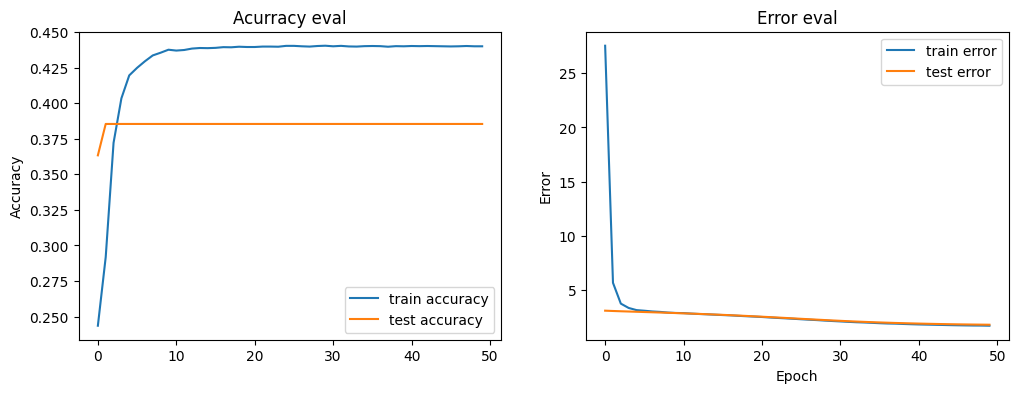

In [ ]:
plot_history(history)